<a href="https://colab.research.google.com/github/cennetceylan19/ImageClassificationMnistExample/blob/main/ExampleMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

# Preparing data

In [4]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# train set - images
x_train.shape

(60000, 28, 28)

In [6]:
#validation ve train set belirleme
x_valid = x_train[48000:]
y_valid = y_train[48000:]

x_train = x_train[:48000]
y_train = y_train[:48000]

In [7]:
x_train.shape

(48000, 28, 28)

In [8]:
x_valid.shape

(12000, 28, 28)

In [9]:
y_valid.shape

(12000,)

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (48000, 28, 28)
48000 train samples
12000 validation samples
10000 test samples


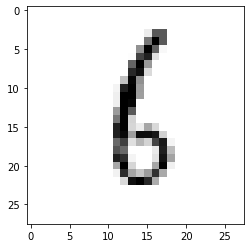

6


In [13]:
# ornek training data
index = 2556
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print(y_train[index])

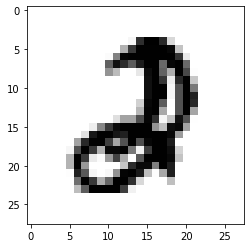

2


In [14]:
# ornek test data
index = 1395
plt.imshow(x_test[index], cmap=plt.cm.binary)
plt.show()
print(y_test[index])

Reshape input_data - 4d

Normal renkli image olsaydi: [28, 28, 3]

Siyah beyaz oldugu icin: [28, 28]

Model eğitimi öncesi aşağıdaki formata çevirmemiz gerekiyor:

[x, 28, 28, 1]

In [15]:
x_train.shape

(48000, 28, 28)

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [17]:
x_train.shape

(48000, 28, 28, 1)

inputlar train oncesi float32 tipine donusturulur

In [18]:
# before
print(x_train.dtype)

uint8


In [19]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

In [20]:
# after
print(x_train.dtype)

float32


Piksel degerleri normalizasyonu

In [21]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [22]:
#normalize pixel values (0-255) -> (0-1)
x_train /= 255
x_valid /= 255
x_test /= 255

In [23]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [24]:
y_train[0]

5

In [25]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Preparing the Model

In [27]:
first_model = Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))

first_model.add(Flatten())
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [28]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

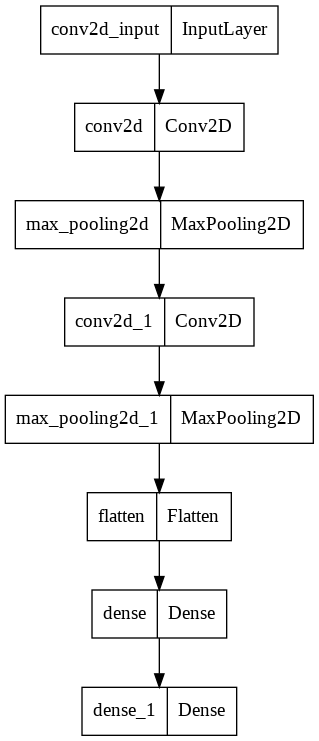

In [29]:
from keras.utils import plot_model
plot_model(first_model)

In [30]:
# compile model
first_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the Model

In [31]:
history = first_model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_valid, y_valid))

Epoch 1/3
375/375 [==============================] - 11s 6ms/step - loss: 0.3066 - accuracy: 0.9121 - val_loss: 0.1192 - val_accuracy: 0.9638
Epoch 2/3
375/375 [==============================] - 2s 5ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 0.0673 - val_accuracy: 0.9793
Epoch 3/3
375/375 [==============================] - 2s 7ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0555 - val_accuracy: 0.9840


# Evaluating the model

In [32]:
score = first_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9851
Test loss: 0.045768190175294876
Test accuracy: 0.9850999712944031


# Saving the model

In [33]:
first_model.save('my_first_mnist_model.h5')

(Opsiyonel) Tek image ile modeli test etme

In [36]:
#download images
!wget -O test_digit_7.png https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
!wget -O test_digit_0.png https://i.stack.imgur.com/FK0FB.png

--2022-12-10 14:29:45--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... failed: Name or service not known.
wget: unable to resolve host address ‘3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com’
--2022-12-10 14:29:45--  https://i.stack.imgur.com/FK0FB.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.92.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.92.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [image/png]
Saving to: ‘test_digit_0.png’

test_digit_0.png    100%[===================>]   4.82K  --.-KB/s    in 0s      

2022-12-10 14:29:46 (56.7 MB/s) - ‘test_digit_0.png’ saved [4934/4934]



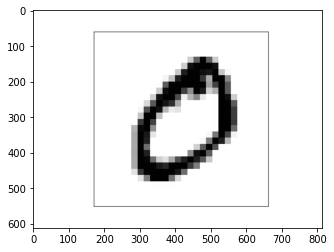

In [38]:
plt.imshow(plt.imread("test_digit_0.png"), cmap=plt.cm.binary)
plt.show()

Kaydettiğimiz modeli tekrar kullanmak istediğimizde aşağıdaki işlemleri kullanırız.

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [40]:
# load model from file
first_model = load_model('my_first_mnist_model.h5')

In [41]:
print(first_model.outputs)

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]


In [43]:
# load image from file
image = load_img("test_digit_0.png", target_size=(28, 28), color_mode="grayscale")
image = img_to_array(image) / 255 # 0-255 -> 0-1
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 28, 28, 1)


In [44]:
preds = first_model.predict(image)

1/1 [==============================] - 0s 112ms/step


In [45]:
preds

array([[5.1143382e-02, 5.5454735e-04, 7.2891274e-03, 2.3743261e-03,
        1.1394188e-04, 8.8233981e-05, 9.3135864e-02, 1.0902203e-05,
        8.4452486e-01, 7.6478982e-04]], dtype=float32)

In [46]:
preds.argmax()

8

(Opsiyonel) Model Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


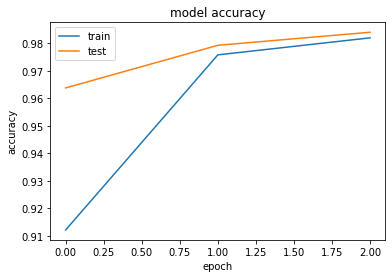

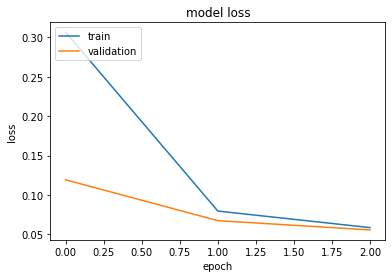

In [48]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()